# Exercício de Algoritmos de Classificação — Dataset de drogas/medicamentos
## Importação das bibliotecas e inicialização do dataframe

In [239]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("drug200.csv")
df

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY
...,...,...,...,...,...,...
195,56,F,LOW,HIGH,11.567,drugC
196,16,M,LOW,HIGH,12.006,drugC
197,52,M,NORMAL,HIGH,9.894,drugX
198,23,M,NORMAL,NORMAL,14.020,drugX


In [240]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

## Procurando por valores nulos ou Not a Number

In [241]:
df.isnull().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

In [242]:
df.isna().sum()

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64

## Checando as drogas e a quantidade de cada uma

In [243]:
df['Drug'].value_counts()

Drug
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: count, dtype: int64

## Limpando as colunas e definindo o target da classificação

In [244]:
features = ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K']
target = 'Drug'

clean_df = df[features]
clean_target = df[target]

## Utilizando LabelEncoder para transformar as colunas de BP e Colesterol

In [245]:
from sklearn.preprocessing import LabelEncoder

le_bp = LabelEncoder()
le_col = LabelEncoder()

clean_df['BP'] = le_bp.fit_transform(clean_df['BP'])
clean_df['Cholesterol'] = le_col.fit_transform(clean_df['Cholesterol'])

C:\Users\disrct\AppData\Local\Temp\ipykernel_12476\2127780391.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['BP'] = le_bp.fit_transform(clean_df['BP'])
C:\Users\disrct\AppData\Local\Temp\ipykernel_12476\2127780391.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_df['Cholesterol'] = le_col.fit_transform(clean_df['Cholesterol'])


## Utilizando One-Hot Encoding para transformar a coluna de sexo

In [246]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

onehot_sex = ColumnTransformer(transformers=[('OneHot', OneHotEncoder(), [1])], remainder='passthrough')
clean_df = onehot_sex.fit_transform(clean_df)

In [247]:
clean_df

array([[ 1.   ,  0.   , 23.   ,  0.   ,  0.   , 25.355],
       [ 0.   ,  1.   , 47.   ,  1.   ,  0.   , 13.093],
       [ 0.   ,  1.   , 47.   ,  1.   ,  0.   , 10.114],
       ...,
       [ 0.   ,  1.   , 52.   ,  2.   ,  0.   ,  9.894],
       [ 0.   ,  1.   , 23.   ,  2.   ,  1.   , 14.02 ],
       [ 1.   ,  0.   , 40.   ,  1.   ,  1.   , 11.349]], shape=(200, 6))

## Colunas transformadas (anotações)

clean_df[0] = Feminino
clean_df[1] = Masculino
clean_df[3] = BP — 0 = HIGH, 1 = LOW, 2 = NORMAL
clean_df[4] = Cholesterol — 0 = HIGH, 1 = NORMAL

## Separando dados de treinamento e dados de teste

In [248]:
from sklearn.model_selection import train_test_split

x_drugs_train, x_drugs_test, y_drugs_train, y_drugs_test = train_test_split(clean_df, clean_target, test_size=0.3, random_state=0)
x_drugs_train.shape, x_drugs_test.shape

((140, 6), (60, 6))

# Testando diferentes algoritmos de classificação
## Naive Bayes

In [249]:
from sklearn.naive_bayes import GaussianNB

naive_drugs = GaussianNB()
naive_drugs.fit(x_drugs_train, y_drugs_train)

model = naive_drugs

## Comparando as previsões do algoritmo com os dados reais

In [250]:
predictions = naive_drugs.predict(x_drugs_test)
predictions

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'drugC', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'drugA', 'drugA',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype='<U5')

In [251]:
np.array(y_drugs_test)

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

## Acurácia

In [252]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_drugs_test)
accuracy = accuracy_score(y_drugs_test, pred)
accuracy

0.8833333333333333

## Matriz de Confusão

0.8833333333333333

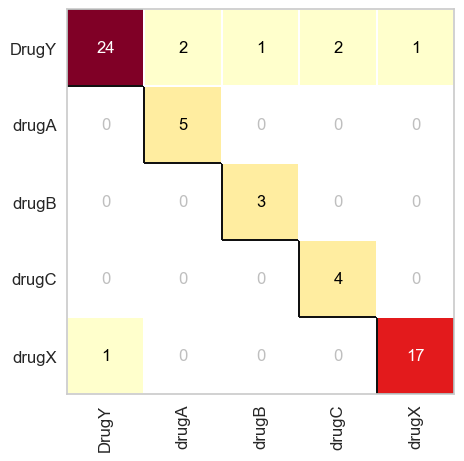

In [253]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))

pred = model.predict(x_drugs_test)
cm = ConfusionMatrix(model)
cm.fit(x_drugs_train, y_drugs_train)
cm.score(x_drugs_test, y_drugs_test)

## Classification Report

In [254]:
from sklearn.metrics import classification_report

print(classification_report(y_drugs_test, pred)) 

              precision    recall  f1-score   support

       DrugY       0.96      0.80      0.87        30
       drugA       0.71      1.00      0.83         5
       drugB       0.75      1.00      0.86         3
       drugC       0.67      1.00      0.80         4
       drugX       0.94      0.94      0.94        18

    accuracy                           0.88        60
   macro avg       0.81      0.95      0.86        60
weighted avg       0.90      0.88      0.89        60



## Decision Tree Classifier

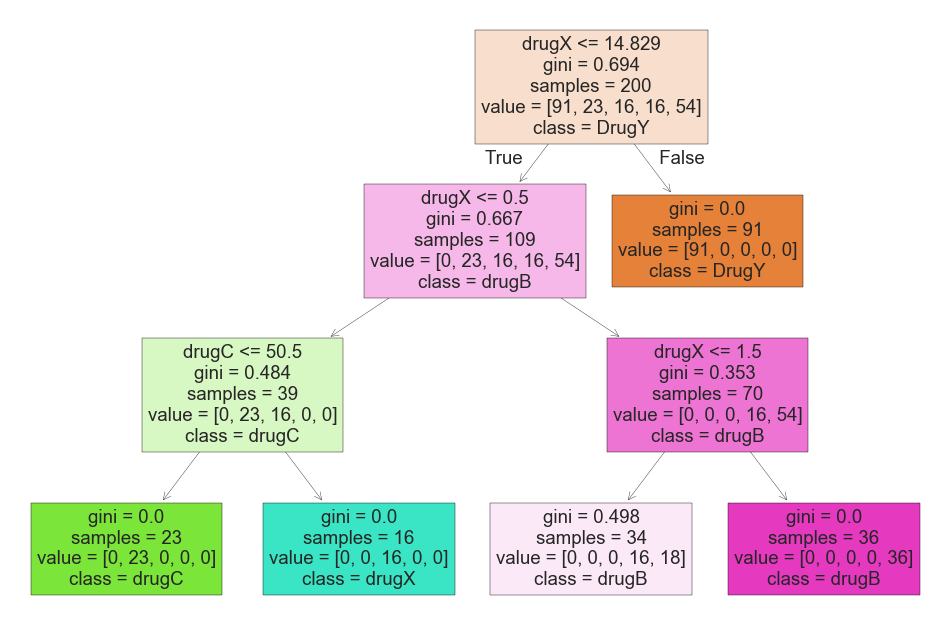

In [255]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
tree = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=42)
tree.fit(clean_df, clean_target)

model = tree

plt.figure(figsize=(12,8))
plot_tree(tree, feature_names=clean_target, class_names=clean_target.unique(), filled=True)
plt.show()

## Comparando as previsões do algoritmo com os dados reais

In [256]:
predictions = tree.predict(x_drugs_test)
predictions

array(['drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugX', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

In [257]:
np.array(y_drugs_test)

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

## Acurácia

In [258]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_drugs_test)
accuracy = accuracy_score(y_drugs_test, pred)
accuracy

0.9333333333333333

## Matriz de Confusão

0.9333333333333333

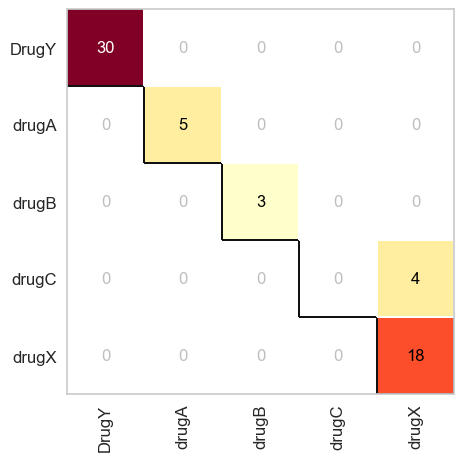

In [259]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))

pred = model.predict(x_drugs_test)
cm = ConfusionMatrix(model)
cm.fit(x_drugs_train, y_drugs_train)
cm.score(x_drugs_test, y_drugs_test)

## Classification Report

In [260]:
from sklearn.metrics import classification_report

print(classification_report(y_drugs_test, pred)) 

              precision    recall  f1-score   support

       DrugY       1.00      1.00      1.00        30
       drugA       1.00      1.00      1.00         5
       drugB       1.00      1.00      1.00         3
       drugC       0.00      0.00      0.00         4
       drugX       0.82      1.00      0.90        18

    accuracy                           0.93        60
   macro avg       0.76      0.80      0.78        60
weighted avg       0.88      0.93      0.90        60



c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier,

## Regressão Logística

In [261]:
from sklearn.linear_model import LogisticRegression

logistic_r = LogisticRegression(random_state=1, max_iter=100)
logistic_r.fit(x_drugs_train, y_drugs_train)

model = logistic_r

c:\Users\disrct\Desktop\IA-Machine-Learning\.venv\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Comparando as previsões do algoritmo com os dados reais

In [262]:
predictions = logistic_r.predict(x_drugs_test)
predictions

array(['drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugA', 'drugC', 'DrugY', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA',
       'drugB', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

In [263]:
np.array(y_drugs_test)

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

## Acurácia

In [264]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_drugs_test)
accuracy = accuracy_score(y_drugs_test, pred)
accuracy

0.85

## Matriz de Confusão

0.85

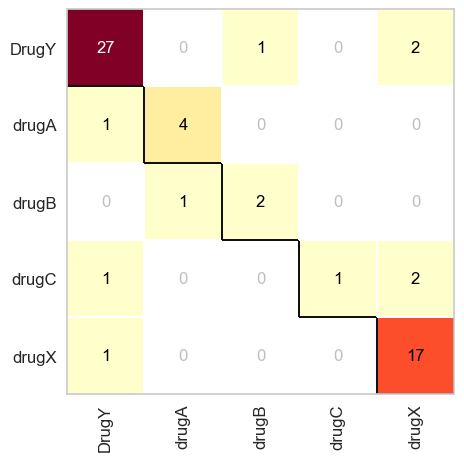

In [265]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))

pred = model.predict(x_drugs_test)
cm = ConfusionMatrix(model)
cm.fit(x_drugs_train, y_drugs_train)
cm.score(x_drugs_test, y_drugs_test)

## Classification Report

In [266]:
from sklearn.metrics import classification_report

print(classification_report(y_drugs_test, pred)) 

              precision    recall  f1-score   support

       DrugY       0.90      0.90      0.90        30
       drugA       0.80      0.80      0.80         5
       drugB       0.67      0.67      0.67         3
       drugC       1.00      0.25      0.40         4
       drugX       0.81      0.94      0.87        18

    accuracy                           0.85        60
   macro avg       0.84      0.71      0.73        60
weighted avg       0.86      0.85      0.84        60



## K-Nearest-Neighbors

In [267]:
from sklearn.neighbors import KNeighborsClassifier

knn_drugs = KNeighborsClassifier(n_neighbors=10)
knn_drugs.fit(x_drugs_train, y_drugs_train)

model = knn_drugs

## Comparando as previsões do algoritmo com os dados reais

In [268]:
predictions = knn_drugs.predict(x_drugs_test)
predictions

array(['drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugB', 'drugX', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugB', 'DrugY', 'drugA', 'drugA', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugB', 'DrugY', 'drugC', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugX', 'DrugY',
       'drugX', 'drugA', 'DrugY', 'drugX'], dtype=object)

In [269]:
np.array(y_drugs_test)

array(['drugC', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'drugX', 'drugX',
       'drugX', 'DrugY', 'drugX', 'drugA', 'DrugY', 'DrugY', 'DrugY',
       'drugB', 'drugC', 'DrugY', 'DrugY', 'drugX', 'DrugY', 'DrugY',
       'drugX', 'drugX', 'drugX', 'DrugY', 'DrugY', 'DrugY', 'DrugY',
       'DrugY', 'drugX', 'drugX', 'drugC', 'drugA', 'drugX', 'DrugY',
       'DrugY', 'drugX', 'DrugY', 'drugA', 'drugX', 'DrugY', 'drugA',
       'DrugY', 'drugX', 'DrugY', 'drugX', 'DrugY', 'DrugY', 'drugA',
       'DrugY', 'DrugY', 'drugB', 'DrugY', 'DrugY', 'drugC', 'DrugY',
       'drugX', 'drugX', 'DrugY', 'drugB'], dtype=object)

## Acurácia

In [270]:
from sklearn.metrics import accuracy_score

pred = model.predict(x_drugs_test)
accuracy = accuracy_score(y_drugs_test, pred)
accuracy

0.75

## Matriz de Confusão

0.75

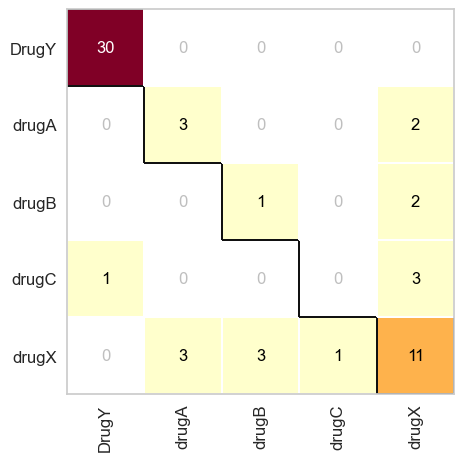

In [271]:
from yellowbrick.classifier import ConfusionMatrix
plt.figure(figsize=(5,5))

pred = model.predict(x_drugs_test)
cm = ConfusionMatrix(model)
cm.fit(x_drugs_train, y_drugs_train)
cm.score(x_drugs_test, y_drugs_test)

## Classification Report

In [272]:
from sklearn.metrics import classification_report

print(classification_report(y_drugs_test, pred)) 

              precision    recall  f1-score   support

       DrugY       0.97      1.00      0.98        30
       drugA       0.50      0.60      0.55         5
       drugB       0.25      0.33      0.29         3
       drugC       0.00      0.00      0.00         4
       drugX       0.61      0.61      0.61        18

    accuracy                           0.75        60
   macro avg       0.47      0.51      0.49        60
weighted avg       0.72      0.75      0.73        60

